# Импорты

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar

# Функции, градиенты и стационарные точки

In [3]:
def f_andrew(x, y):
    return x ** 4 - 2 * x ** 2 + y ** 2 - 2 * y


def gradient_andrew(x, y):
    df_dx = 4 * x ** 3 - 4 * x
    df_dy = 2 * y - 2
    return np.array([df_dx, df_dy])


stationary_points_andrew = [
    (0, 1, 'седло'),
    (1, 1, 'минимум'),
    (-1, 1, 'минимум')
]

# Задание 1.
Построить график функции и линии уровня. Отметить стационарные точки. При необходимости сузить
область, на которой рассматривается функция.

In [4]:
def show_plots(f, stationary_points, view_angle=(25, 45), x=np.linspace(-1.2, 1.2, 400), y=np.linspace(-1, 2, 400)):
    """
    Построение 3D графика функции и закрашенных линий уровня с отметками стационарных точек

    :param f: Функция двух переменных f(x, y)
    :param stationary_points: Список стационарных точек в формате [(x1, y1, 'тип1'), (x2, y2, 'тип2'), ...]
    :param view_angle: Угол обзора для 3D графика (elev, azim)
    :param x: Массив значений по оси x
    :param y: Массив значений по оси y
    """

    # Создание сетки для графиков
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # Создание фигуры
    fig = plt.figure(figsize=(18, 18 * 2))

    # 3D график
    # Линии уровня
    ax1 = fig.add_subplot(211, projection='3d')
    ax1.view_init(elev=view_angle[0], azim=view_angle[1])
    ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

    # Отметка стационарных точек
    for px, py, ptype in stationary_points:
        ax1.scatter([px], [py], [f(px, py)], color='red', s=200, marker='o')
        ax1.text(px, py, f(px, py), f'  {ptype}\n  ({px},{py})', fontsize=15)

    # Настройки вывода
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('f(x,y)')
    ax1.set_title('3D график')

    # Закрашенные линии уровня
    # Линии уровня
    ax2 = fig.add_subplot(212)
    contourf = ax2.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(contourf, ax=ax2, label='f(x,y)')

    # Отметка стационарных точек
    for px, py, ptype in stationary_points:
        color = 'red' if ptype == 'седло' else 'white'
        ax2.scatter([px], [py], color=color, s=200, marker='o')
        ax2.annotate(f'{ptype}\n({px},{py})', xy=(px, py), xytext=(px + 0.05, py + 0.05),
                     fontsize=15, color='white', bbox=dict(facecolor='black'))

    # Настройки вывода
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('Закрашенные линии уровня')
    ax2.grid(True, alpha=0.3)
    ax2.set_aspect('equal', adjustable='box')

    # Отобржение графиков
    plt.tight_layout()
    plt.show()

In [ ]:
show_plots(f_andrew, stationary_points_andrew, (40, 65))

# Задание 2.
Покажите, что направление наискорейшего возрастания функции совпадает с направлением градиента
функции, а убывания – с направлением антиградиента.

In [5]:
def visualize_gradient_analysis(f, gradient, test_points, start_point=(0.5, 0.0), x=np.linspace(-1.5, 1.5, 400),
                                y=np.linspace(-1, 2.5, 400), step_count=100, step_size=0.05):
    """
    Показывает векторы градиента и антиградиента в тестовых точках.
    Строит траектории движения вдоль градиента и антиградиента.

    :param f: Функция двух переменных f(x, y).
    :param gradient: Функция, возвращающая градиент в точке (x, y).
    :param test_points: Список точек для анализа в формате [(x, y, 'метка'), ...].
    :param start_point: Начальная точка (x, y) для построения траекторий.
    :param x: Массив значений по оси x.
    :param y: Массив значений по оси y.
    :param step_count: Количество шагов для построения траекторий.
    :param step_size: Размер шага для построения траекторий.
    """
    # Создание сетки для графиков
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # Создание фигуры
    fig = plt.figure(figsize=(18, 18 * 2))

    # Векторы градиента и антиградиента в тестовых точках
    # Линии уровня
    ax1 = fig.add_subplot(211)
    ax1.contour(X, Y, Z, levels=50, cmap='viridis', alpha=0.6)

    # Векторы градиента и антиградиента в заданных точках
    for i, (px, py, label) in enumerate(test_points):
        # Отметка точки
        ax1.scatter([px], [py], color='red', s=200, marker='o')
        ax1.text(px + 0.15, py + 0.15, f'{label}\n ({px},{py})', fontsize=15)

        # Вычисление градиента в точке
        grad = gradient(px, py)

        # Если градиент не нулевой, рисуем векторы
        if np.linalg.norm(grad) > 1e-9:
            # Масштабирование для визуализации
            grad_viz = grad * 0.1

            # Вектор градиента
            ax1.arrow(px, py, grad_viz[0], grad_viz[1], head_width=0.02, head_length=0.01,
                      fc='red', ec='red', linewidth=1.5,
                      label='∇f - рост' if i == 0 else "")

            # Вектор антиградиента
            ax1.arrow(px, py, -grad_viz[0], -grad_viz[1], head_width=0.02, head_length=0.01,
                      fc='blue', ec='blue', linewidth=1.5,
                      label='-∇f - убывание' if i == 0 else "")
        else:
            ax1.text(px - 0.1, py - 0.1, 'Градиент = 0', color='black', fontsize=12)

    # Настройки вывода
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title('Векторы градиента в тестовых точках')
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal', adjustable='box')
    ax1.legend()

    # Траектории вдоль градиента и антиградиента
    # Линии уровня
    ax2 = fig.add_subplot(212)
    ax2.contour(X, Y, Z, levels=50, cmap='viridis', alpha=0.6)

    # Функция для построения траектории
    def plot_trajectory(start, direction, color, label):
        points = [start]
        current_point = np.array(start)

        for _ in range(step_count):
            # Вычисление градиента в текущей точке
            grad = gradient(current_point[0], current_point[1])
            # Остановка, если градиент близок к нулю
            if np.linalg.norm(grad) < 1e-9:
                break
            # Формирование шага
            step = grad / np.linalg.norm(grad) * step_size * direction
            # Обновление текущей точки
            current_point += step
            # Добавление точки в траекторию
            points.append(current_point.copy())

        points = np.array(points)
        ax2.plot(points[:, 0], points[:, 1], color=color, linewidth=2, label=label)
        ax2.scatter(points[:, 0], points[:, 1], color=color, s=50, marker='o')

    # Построение траекторий
    plot_trajectory(start_point, 1, 'red', 'Траектория вдоль градиента')
    plot_trajectory(start_point, -1, 'blue', 'Траектория вдоль антиградиента')

    # Настройки вывода
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('Траектории вдоль градиента и антиградиента')
    ax2.grid(True, alpha=0.3)
    ax2.set_aspect('equal', adjustable='box')
    ax2.set_xlim(x.min(), x.max())
    ax2.set_ylim(y.min(), y.max())
    ax2.legend()
    plt.show()



In [ ]:
test_points = [
    (0.5, 0.5, 'Точка 1'),
    (-0.5, 1.5, 'Точка 2'),
    (1.0, 0.0, 'Точка 3'),
    (-1.0, 2.0, 'Точка 4'),
    (0, 1, 'Стационарная точка')
]

visualize_gradient_analysis(f_andrew, gradient_andrew, test_points)

# Задание 3-7.
При реализации методов рекомендуем заложить алгоритм запоминания всех точек приближения, а
также количество итераций метода.

Реализовать следующие алгоритмы градиентных спусков

$$
x^{k+1} = x^k - \alpha^k \nabla f(x^k)
$$

- (a) где a^k выбирается постоянной
- (b) где a^k в процессе вычисления делится на какое-то число
- (c) где $a^k = argmin f(x^k - a \nabla f(x^k)) $, то есть метод наискорейшего спуска
- (d) метод Полака-Рейбера

### Метод Полака-Рейбера

1. Вычислить градиент в начальной точке:
$$
d_0 = r_0 =  -\nabla f(x_0)
$$
2. Осуществляется спуск в вычисленном направлении пока функция уменьшается, иными словами, поиск $a_i$, который минимизирует
$$
f(x_k + a_i d_k)
$$
3. Переход в точку, найденную на предыдущем шаге:
$$
x_{i+1} = x_i + a_i d_k
$$
4. Вычисление антиградиента в этой точке:
$$
r_{i+1} = -\nabla f(x_{i+1})
$$
5. Вычисление коэффициента b_i по формуле:
$$
b_{i+1} = \frac{r_{i+1} (r_{i+1} - r_i)}{r_i^T r_i}
$$
$$
b_{i+1} = max(b_{i+1}, 0)
$$
6. Вычисление нового сопряженного направления:
$$
d_{i+1} = r_{i+1} + b_{i+1} d_i
$$
7. Повторение шагов 2-6 до сходимости.

In [20]:
class GradientDescentOptimizer:
    """
    Класс для реализации различных методов градиентного спуска.
    Сохраняет все точки приближения и количество итераций.
    """

    def __init__(self, f, gradient, start_point=(0.5, 0.0), max_iter=1000, tol=1e-6):
        """
        Инициализация оптимизатора.

        :param f: Функция двух переменных f(x, y).
        :param gradient: Функция, возвращающая градиент в точке (x, y).
        :param start_point: Начальная точка (x0, y0).
        :param max_iter: Максимальное количество итераций.
        :param tol: Критерий остановки - норма градиента.
        """
        self.f = f
        self.gradient = gradient
        self.start_point = start_point
        self.max_iter = max_iter
        self.tol = tol

    def constant_step(self, alpha=0.1):
        """
        Градиентный спуск с постоянным шагом. 

        :param alpha: Постоянный размер шага.
        :return: Словарь с результатами оптимизации.
        """
        points = [self.start_point.copy()]
        current_point = self.start_point.copy()

        for iteration in range(self.max_iter):
            # Вычисление градиента в текущей точке
            grad = self.gradient(current_point[0], current_point[1])
            # Проверка критерия остановки
            if np.linalg.norm(grad) < self.tol:
                break
            # Обновление точки
            current_point = current_point - alpha * grad
            points.append(current_point.copy())

        return {
            'method': f'Постоянный шаг a={alpha}',
            'points': np.array(points),
            'iterations': len(points) - 1,
            'final_point': current_point,
            'final_value': self.f(current_point[0], current_point[1]),
            'final_grad_norm': np.linalg.norm(grad)
        }

    def diminishing_step(self, alpha0=0.5, divisor=1.05):
        """
        Градиентный спуск с уменьшающимся шагом.

        :param alpha0: Начальный размер шага.
        :param divisor: Делитель для уменьшения шага.
        :return: Словарь с результатами оптимизации.
        """
        points = [self.start_point.copy()]
        current_point = self.start_point.copy()

        for iteration in range(self.max_iter):
            # Вычисление градиента в текущей точке
            grad = self.gradient(current_point[0], current_point[1])
            # Проверка критерия остановки
            if np.linalg.norm(grad) < self.tol:
                break
            # Вычисление текущего шага
            alpha_k = alpha0 / (divisor ** iteration)
            # Обновление точки
            current_point = current_point - alpha_k * grad
            points.append(current_point.copy())

        return {
            'method': f'Уменьшающийся шаг alpha0={alpha0}, divisor={divisor}',
            'points': np.array(points),
            'iterations': len(points) - 1,
            'final_point': current_point,
            'final_value': self.f(current_point[0], current_point[1]),
            'final_grad_norm': np.linalg.norm(grad)
        }

    def steepest_descent(self):
        """
        Метод наискорейшего спуска.

        :return: Словарь с результатами оптимизации
        """
        points = [self.start_point.copy()]
        current_point = self.start_point.copy()

        for iteration in range(self.max_iter):
            # Вычисление градиента в текущей точке
            grad = self.gradient(current_point[0], current_point[1])
            # Проверка критерия остановки
            if np.linalg.norm(grad) < self.tol:
                break

            # Одномерная оптимизация для поиска оптимального шага
            def line_search(alpha):
                new_point = current_point - alpha * grad
                return self.f(new_point[0], new_point[1])

            # Поиск оптимального шага
            result = minimize_scalar(line_search, bounds=(0, 1), method='bounded')
            alpha_optimal = result.x
            # Обновление точки
            current_point = current_point - alpha_optimal * grad
            points.append(current_point.copy())

        return {
            'method': 'Наискорейший спуск',
            'points': np.array(points),
            'iterations': len(points) - 1,
            'final_point': current_point,
            'final_value': self.f(current_point[0], current_point[1]),
            'final_grad_norm': np.linalg.norm(grad)
        }

    def Polak_Ribiere(self):
        """
        Метод Полака-Рейбера.

        :return: Словарь с результатами оптимизации.
        """
        points = [self.start_point.copy()]
        current_point = self.start_point.copy()

        # Начальные значения
        r_k = -self.gradient(current_point[0], current_point[1])
        d_k = r_k.copy()

        for iteration in range(self.max_iter):
            # Проверка критерия остановки
            if np.linalg.norm(r_k) < self.tol:
                break

            # Одномерная оптимизация для поиска оптимального шага
            def line_search(alpha):
                new_point = current_point + alpha * d_k
                return self.f(new_point[0], new_point[1])

            # Поиск оптимального шага
            result = minimize_scalar(line_search, bounds=(0, 1), method='bounded')
            alpha_k = result.x

            # Обновление точки
            current_point = current_point + alpha_k * d_k
            points.append(current_point.copy())

            # Вычисление нового антиградиента
            r_k1 = -self.gradient(current_point[0], current_point[1])

            # Вычисление коэффициента b_k
            beta_k = np.dot(r_k1, r_k1 - r_k) / np.dot(r_k, r_k)
            beta_k = max(beta_k, 0)

            # Обновление направления
            d_k = r_k1 + beta_k * d_k

            # Обновление антиградиента
            r_k = r_k1

        return {
            'method': 'Метод Полака-Рейбера',
            'points': np.array(points),
            'iterations': len(points) - 1,
            'final_point': current_point,
            'final_value': self.f(current_point[0], current_point[1]),
            'final_grad_norm': np.linalg.norm(r_k)
        }


In [21]:
def visualize_optimization_results(f, results, x=np.linspace(-1.5, 1.5, 400), y=np.linspace(-1, 2.5, 400)):
    """
    Визуализация результатов оптимизации на фоне линий уровня функции.

    :param f: Функция двух переменных f(x, y).
    :param results: Список словарей с результатами оптимизации.
    :param x: Массив значений по оси x.
    :param y: Массив значений по оси y.
    """
    # Создание сетки для графиков
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # Создание фигуры
    plt.figure(figsize=(18, 18 * len(results)))

    for i, result in enumerate(results):
        # Линии уровня
        ax = plt.subplot(len(results), 1, i + 1)
        ax.contour(X, Y, Z, levels=50, cmap='viridis', alpha=0.6)

        # Траектория оптимизации
        points = result['points']
        ax.plot(points[:, 0], points[:, 1], color='red', linewidth=2)
        ax.scatter(points[:, 0], points[:, 1], color='red', s=50, marker='o')

        # Настройки вывода
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(f'{result["method"]}\n'
                     f'Итераций: {result["iterations"]}\n'
                     f'Точка: ({result["final_point"][0]:.4f}, {result["final_point"][1]:.4f})\n'
                     f'Значение функции: {result["final_value"]:.4f}\n'
                     f'Норма градиента: {result["final_grad_norm"]:.10f}')
        ax.grid(True, alpha=0.3)
        ax.set_aspect('equal', adjustable='box')
        ax.set_xlim(x.min(), x.max())
        ax.set_ylim(y.min(), y.max())

    plt.show()




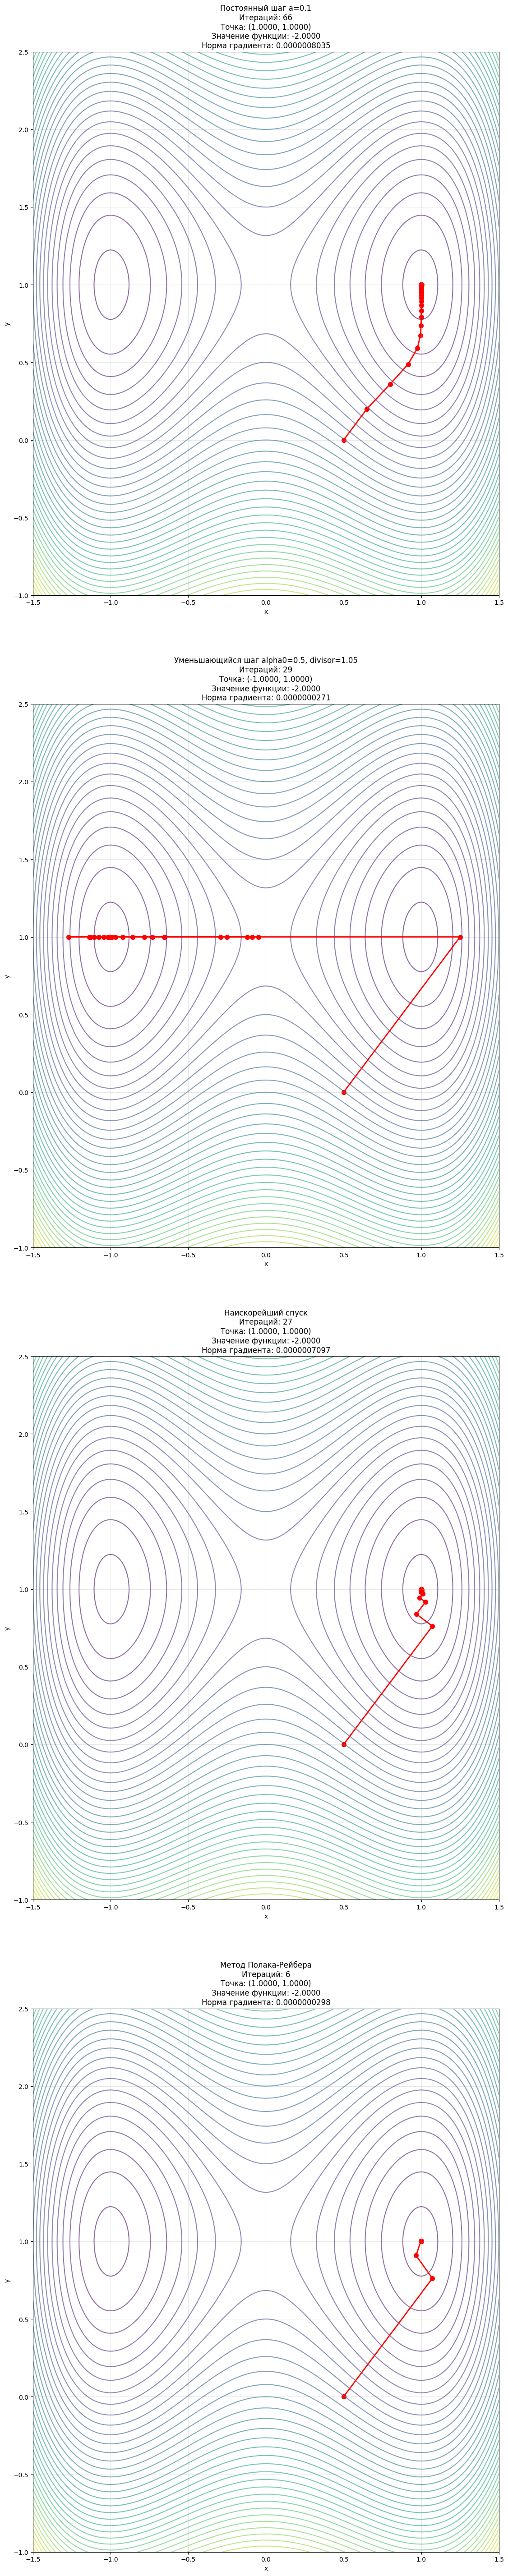

In [22]:
optimizer = GradientDescentOptimizer(f_andrew, gradient_andrew, start_point=np.array([0.5, 0.0]))
results = [
    optimizer.constant_step(alpha=0.1),
    optimizer.diminishing_step(alpha0=0.5, divisor=1.05),
    optimizer.steepest_descent(),
    optimizer.Polak_Ribiere()
]
visualize_optimization_results(f_andrew, results)